# 1.4.13 Hough Line Transform

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
gray = cv2.imread('IMG_6504.JPG', 0)

In [4]:
edges = cv2.Canny(gray,150,200,apertureSize=3)

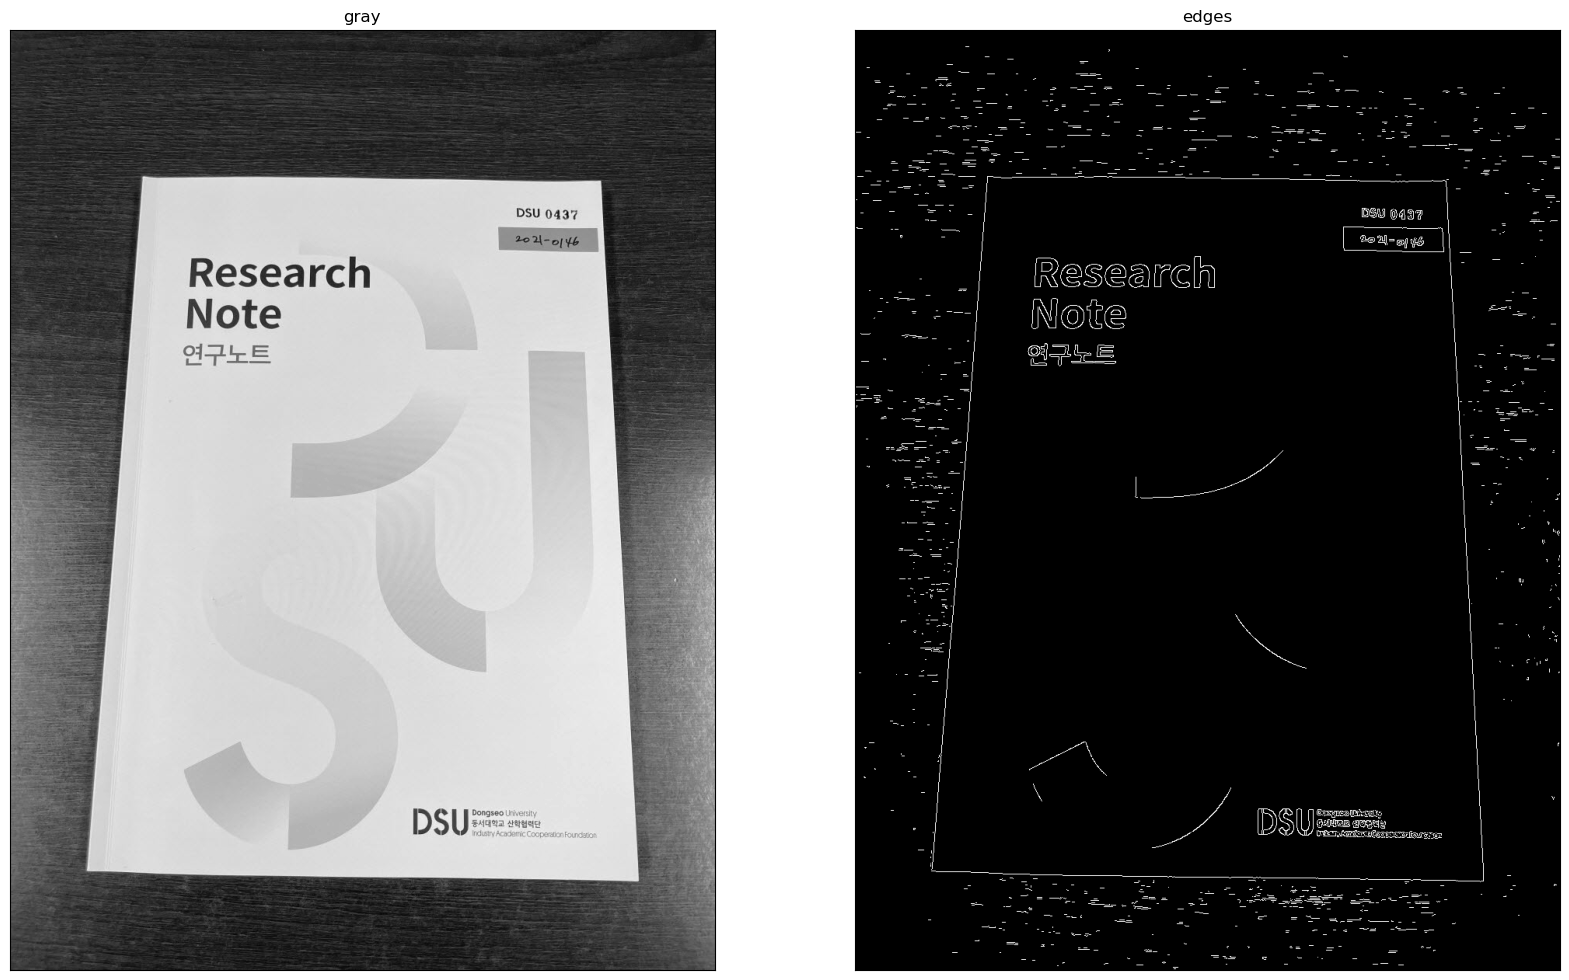

In [5]:
plt.figure(figsize = (20,40))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)

In [16]:
lines.shape[0]

5

In [17]:
img = cv2.imread('IMG_6504.JPG')
for i in range(lines.shape[0]):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho; y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

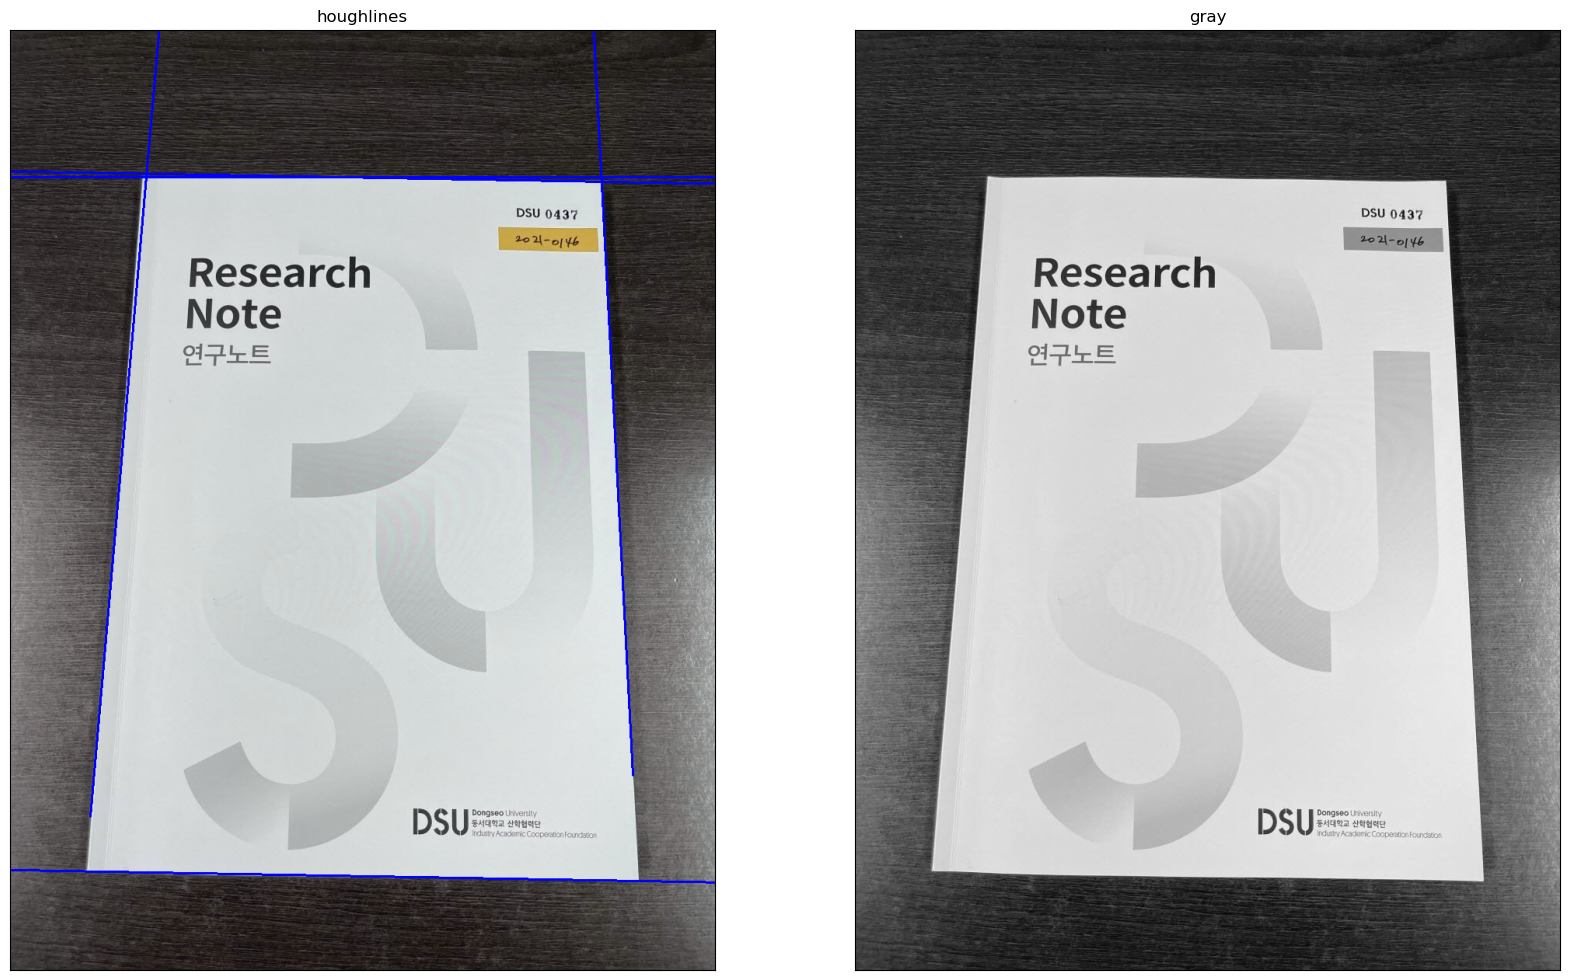

In [18]:
plt.figure(figsize = (20,40))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('houghlines'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
def nothing(x):
    pass

In [22]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 100, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 100, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    img_rgb = cv2.imread('IMG_6504.JPG')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (155,155,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_rgb,(x1,y1),(x2,y2),(155,155,255),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2570: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


## Probabilistic Hough Transform

In [23]:
gray = cv2.imread('dsu7.jpg', 0)
edges = cv2.Canny(gray,150,200,apertureSize = 3)

In [24]:
minLineLength = 50
maxLineGap = 50
lines = cv2.HoughLinesP(edges,1,np.pi/180,threshold = 100,minLineLength=minLineLength,maxLineGap=maxLineGap)
img = cv2.imread('dsu7.jpg')

In [25]:
lines.shape

(36, 1, 4)

In [26]:
for i in range(lines.shape[0]):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

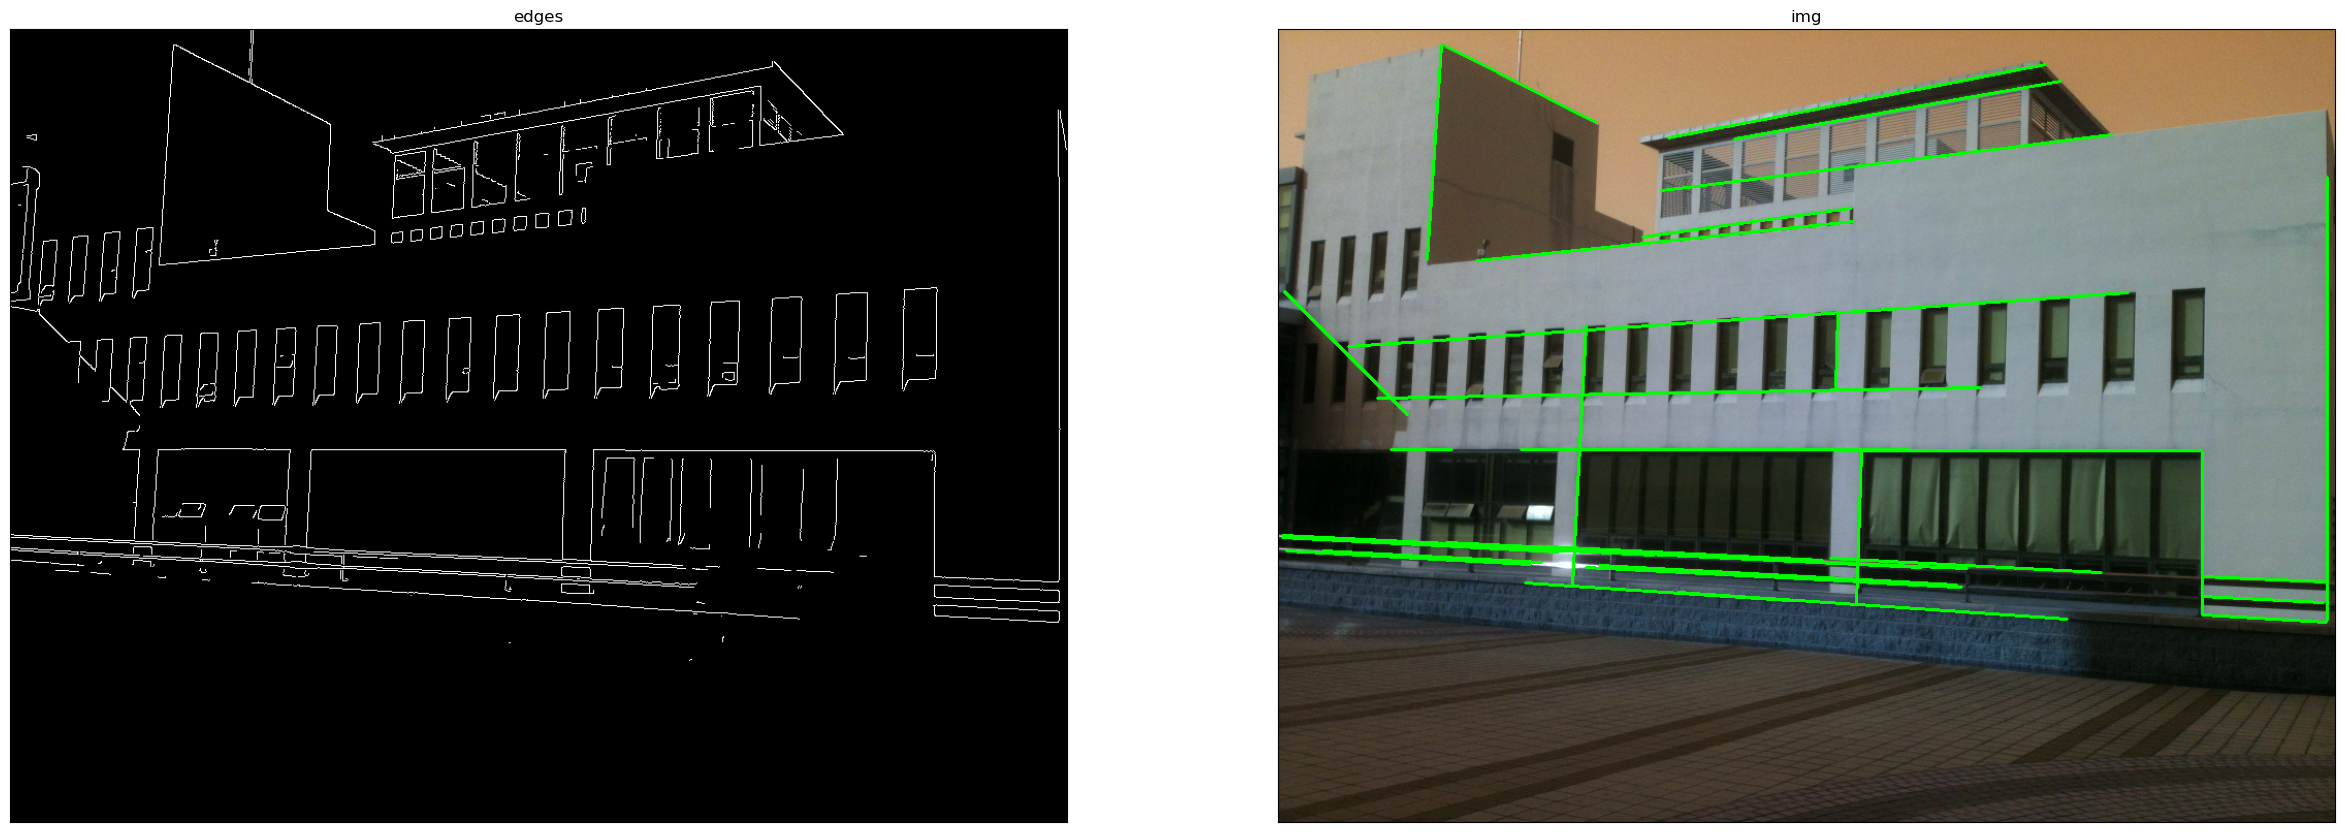

In [27]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(edges,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cv2.namedWindow('image')
cv2.createTrackbar('minLineLength', 'image', 1, 500, nothing)
cv2.createTrackbar('maxLineGap', 'image', 1, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 500, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    lineLength = cv2.getTrackbarPos('minLineLength', 'image')
    lineGap = cv2.getTrackbarPos('maxLineGap', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLinesP(edges,rho = 1,theta = np.pi/180,threshold = 100,minLineLength = lineLength,maxLineGap = lineGap)
    
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])+"minLineLength:"+str(lineLength)  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

In [1]:
img = cv2.imread('IMG_6504.JPG',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

NameError: name 'cv2' is not defined

In [36]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=350,param2=50,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

In [37]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()